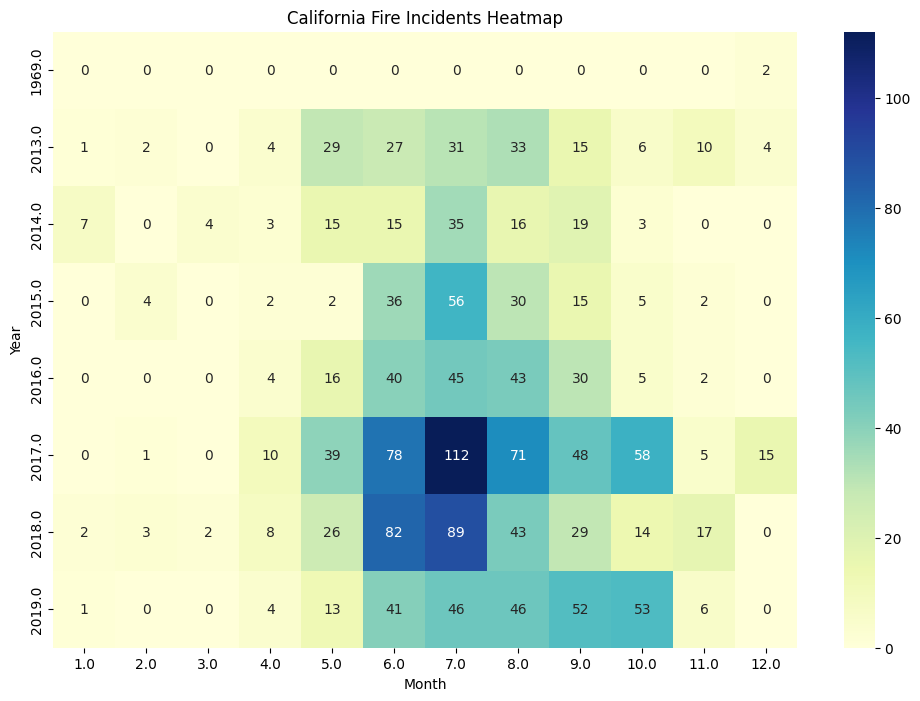

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('California_Fire_Incidents.csv')

# Convert the 'Started' column to datetime
df['Started'] = pd.to_datetime(df['Started'], errors='coerce')

# Extract year and month from the 'Started' column
df['Year'] = df['Started'].dt.year
df['Month'] = df['Started'].dt.month

# Aggregate the data by year and month
heatmap_data = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('California Fire Incidents Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [3]:
import folium
from folium.plugins import HeatMap
# Drop rows with missing latitude or longitude
df = df.dropna(subset=['Latitude', 'Longitude'])
# Create a base map
map_center = [37.0, -120.0]  # Central latitude and longitude of California
base_map = folium.Map(location=map_center, zoom_start=6)
# Create a list of latitude and longitude pairs
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Add the heatmap layer to the base map
HeatMap(heat_data).add_to(base_map)
# Display the map
base_map


In [4]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders', 'Year', 'Month'],
      dtype='object')